# Valuation of currencies against a currency basket 
This code simply converts two currency pairs (A/B and A/C) to B/C. 
Whereby A/B or B/C could also be a basket of currencies which makes it possible
to determine the value of a single currency against a broader basket of other currencies. 
## The following USD denominated baskets are provided by FRED and can be used for comparison:
__DTWEXM__ Trade Weighted U.S. Dollar Index: Major Currencies
__DTWEXO__ Trade Weighted U.S. Dollar Index: Other Important Trading Partners
__DTWEXB__ Trade Weighted U.S. Dollar Index: Broad
_(Don't compare a currency against a basket that contains the currency itself!)_
## List of available currencies for valuation https://fred.stlouisfed.org/categories/94

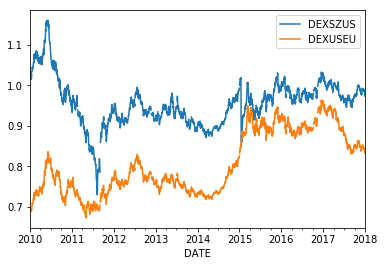

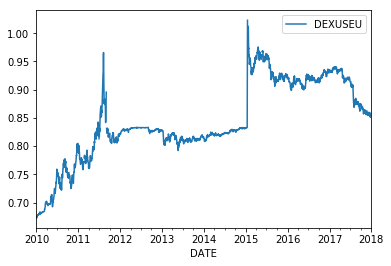

In [155]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import datetime

START = datetime.datetime(2010, 1, 1)
END = datetime.datetime(2018, 1, 1)

def fetchFxRates(symbol, invert=False):
    fxRates = data.DataReader(symbol, "fred", START, END)
    return fxRates if not invert else fxRates.applymap(lambda x: 1/x)

usdchf = fetchFxRates("DEXSZUS", False)
usdeur = fetchFxRates("DEXUSEU", True)
chfeur = usdeur.div(usdchf.iloc[:,0], axis='index')

eurP = usdchf.plot.line()
usdeur.plot(ax=eurP)

chfeur.plot()
plt.show()